# **EDA**

#### Realizamos un Exploratory Data Analysis (`EDA`) para conocer en profundidad los datos, y transformarlos de acuerdo a lo que se necesite para la implementación del modelo de machine learning.

+ #####  Al final de éste se encontrará la conclusión general

In [2]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Importamos el data set "df_streaming" anteriormente tratado en el archivo (ETL.ipynb)
df = pd.read_csv("Datasets/df_streaming_completo.csv")
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score
7502,s7503,movie,yakov smirnoff: from moscow... idaho,louis j. horvitz,yakov smirnoff,NaN,NaN,1991,16+,53 min,"arts, entertainment, and culture, comedy, spec...",a stand-up comedy special starring yakov smirn...,as7503,53.0,min,3.57
12509,s1392,movie,babyteeth,NaN,NaN,NaN,2020-09-18,2019,g,118 min,"comedy, drama",a terminally ill teen upsets her parents when ...,hs1392,118.0,min,3.52
10580,s913,movie,get a clue,maggie greenwald,"lindsay lohan, bug hall, ian gomez, brenda son...",united states,2019-11-12,2002,tv-g,84 min,"drama, mystery",a teenage gossip columnist takes on the case o...,ds913,84.0,min,3.53


In [4]:
# Observamos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration       22516 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  id             22998 non-null  object 
 13  duration_int   22516 non-null  float64
 14  duration_type  22516 non-null  object 
 15  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(13)
memory usage: 2.8+ MB


In [5]:
# Esto nos aporta mucha información para una primera vista
df.describe()

,release_year,duration_int,score
count,22998.000000,22516.00000,22998.000000
mean,2010.811244,67.11725,3.533449
std,15.401142,51.40163,0.048639
min,1920.000000,0.00000,3.340000
25%,2010.000000,3.00000,3.500000
50%,2016.000000,85.00000,3.530000
75%,2019.000000,102.00000,3.570000
max,2021.000000,601.00000,3.720000


In [6]:
# Primero observamos si hay datos duplicados utilizando el "id", ya que al ser un id se espera que sea único
df.duplicated("id").sum()

0

In [7]:
# Observamos más en detalle cuántos valores faltantes hay 
df.isna().sum().sort_values(ascending=False)

country          11499
date_added        9554
director          8259
cast              5321
duration           482
duration_int       482
duration_type      482
description          4
show_id              0
type                 0
title                0
release_year         0
rating               0
listed_in            0
id                   0
score                0
dtype: int64

In [8]:
#Porcentaje de valores faltantes de cada columna:
print("country: ",((df["country"].isnull().sum()/len(df))*100),"%",
      "\ndate_added: ",((df["date_added"].isnull().sum()/len(df))*100),"%",
      "\ndirector: ",((df["director"].isnull().sum()/len(df))*100),"%",
      "\ncast: ",((df["cast"].isnull().sum()/len(df))*100),"%",
      "\nduration: ",((df["duration"].isnull().sum()/len(df))*100),"%")

country:  50.0 % 
date_added:  41.5427428472041 % 
director:  35.91181841899296 % 
cast:  23.1367945038699 % 
duration:  2.0958344203843815 %


#### Continuaremos observando las colummnas con datos faltantes : 

+ #### Country

In [9]:
# Hacemos un conteo de sus valores
df["country"].value_counts()

united states                                                  4997
india                                                          1203
united kingdom                                                  583
japan                                                           515
canada                                                          237
                                                               ... 
lebanon, united arab emirates, france, switzerland, germany       1
france, belgium, italy                                            1
lebanon, united states, united arab emirates                      1
lebanon, france                                                   1
united arab emirates, jordan                                      1
Name: country, Length: 886, dtype: int64

In [10]:
# Se puede observar que hay datos con más de 1 país 
df["country"].unique()

array(['canada', 'india', 'united states', 'united kingdom', 'france',
       'spain', nan, 'italy', 'united kingdom, france',
       'united states, italy', 'united states, india',
       'united kingdom, united states',
       'united states, united kingdom, germany', 'japan',
       'china, united states, united kingdom',
       'denmark, united kingdom, czech republic, netherlands',
       'united states, ireland', 'united states, united kingdom, canada',
       'united kingdom, united states, india', 'united kingdom, india',
       'united states, china', 'canada, united states',
       'united states, thailand', 'brazil, united states, india',
       'switzerland, india', 'united kingdom, canada, united states',
       'germany', 'australia', 'belgium',
       'chile, argentina, united states', 'mexico',
       'denmark, sweden, united states', 'netherlands',
       'united states, united kingdom', 'new zealand',
       'united states, portugal', 'united states, france',
       '

+ #### Date_added

In [11]:
df["date_added"].unique()

array(['2021-03-30', '2021-04-01', '2021-04-04', ..., '2018-12-06',
       '2016-03-09', '2020-01-11'], dtype=object)

In [12]:
df["date_added"].value_counts()

2019-11-12    724
2020-01-01    146
2021-07-01    132
2021-09-01    107
2019-12-31    105
             ... 
2015-12-07      1
2017-11-30      1
2015-11-17      1
2017-12-05      1
2020-01-11      1
Name: date_added, Length: 2003, dtype: int64

+ #### Director

In [13]:
df["director"].value_counts()

mark knight              113
cannis holder             61
jay chapman               46
moonbug entertainment     37
arthur van merwijk        30
                        ... 
charles wilkinson          1
dominic brunt              1
sean breathnach            1
cindy jansen               1
mozez singh                1
Name: director, Length: 10095, dtype: int64

In [14]:
df["director"].unique()

array(['don mckellar', 'girish joshi', 'josh webber', ...,
       'chandra prakash dwivedi', 'majid al ansari', 'mozez singh'],
      dtype=object)

+ #### Cast

In [15]:
df["cast"].value_counts()

maggie binkley                                                                                                                           56
1                                                                                                                                        34
anne-marie newland                                                                                                                       24
david attenborough                                                                                                                       22
cassandra peterson                                                                                                                       21
                                                                                                                                         ..
mohanlal, gautami, viswant duddumpudi, anisha ambrose, p. balachandran, joy mathew, raina rao                                             1
charl washington, co

In [16]:
df["cast"].unique()

array(['brendan gleeson, taylor kitsch, gordon pinsent',
       'mahesh manjrekar, abhay mahajan, sachin khedekar',
       'tom sizemore, lorenzo lamas, robert lasardo, richard jones, yancey arias, noel gugliemi',
       ...,
       'jesse eisenberg, woody harrelson, emma stone, abigail breslin, amber heard, bill murray, derek graf',
       'tim allen, courteney cox, chevy chase, kate mara, ryan newman, michael cassidy, spencer breslin, rip torn, kevin zegers',
       'vicky kaushal, sarah-jane dias, raaghav chanana, manish chaudhary, meghna malik, malkeet rauni, anita shabdish, chittaranjan tripathy'],
      dtype=object)

+ #### Duration (duration_int, duration_type)

In [17]:
# Observamos si los valores faltantes son de películas o series
df["type"].value_counts()

movie      16481
tv show     6517
Name: type, dtype: int64

In [18]:
# Podemos sacar la conclusión de que los valores faltantes son solo de películas, "min" (minutos) refiere a estas 
df["duration_type"].value_counts()

min       15999
season     6517
Name: duration_type, dtype: int64

In [19]:
df["duration"].value_counts()

1 season      4183
2 seasons     1001
3 seasons      475
90 min         429
91 min         419
              ... 
550 min          1
485 min          1
20 seasons       1
207 min          1
201 min          1
Name: duration, Length: 253, dtype: int64

In [20]:
# Aquí se puede observar que hay 10 registros que tienen 0 de duración
df[df["duration_int"] == 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score
788,s789,movie,testing title - parichey is using this title,tester,test1,NaN,NaN,2020,all,0 min,action,test movie for upload,as789,0.0,min,3.52
1381,s1382,movie,paradise canyon - digitally remastered,carl pierson,"john wayne, marion burns, earle hodgins, yakim...",NaN,NaN,1935,7+,0 min,"action, adventure",an undercover agent for the government is sent...,as1382,0.0,min,3.56
1590,s1591,movie,movie_project_un_test_uhd,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,0 min,comedy,movie_project_un_test_uhd short,as1591,0.0,min,3.53
4704,s4705,movie,asin_tombstone_test_target,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,0 min,comedy,asin_tombstone_test_target short,as4705,0.0,min,3.57
5162,s5163,movie,asin_tombstone_test_target_04,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,0 min,comedy,asin_tombstone_test_target_04 short,as5163,0.0,min,3.63
5191,s5192,movie,asintombstonetest-target,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,0 min,comedy,asintombstonetest-target short,as5192,0.0,min,3.52
5701,s5702,movie,primevideoqatestmovie16 us,test director us,"test actor1 us, test actor2",NaN,NaN,2015,g,0 min,"action, drama",primevideoqatestmovie16 us title summary goes ...,as5702,0.0,min,3.54
6219,s6220,movie,primevideoqamovie11 us,test director us,"test actor1 us, test actor2",NaN,NaN,2015,g,0 min,"action, drama",primevideoqamovie11 us title summary goes here...,as6220,0.0,min,3.56
8575,s8576,movie,projectununapprovedmovietarget,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,0 min,comedy,projectununapprovedmovietarget short,as8576,0.0,min,3.62
8834,s8835,movie,molly and me,lewis seiler,"gracie fields, roddy mcdowall, monty woolley, ...",NaN,NaN,1945,pg,0 min,"arts, entertainment, and culture, comedy","molly (fields), a poor struggling actress, dec...",as8835,0.0,min,3.56


#### Continuaremos con las demás columnas ...

+ #### Rating

In [21]:
# Como podemos observar, hay datos de duration en la columna rating, lo que es una situacion a corregir
df["rating"].unique()

array(['g', '13+', 'all', '18+', 'r', 'tv-y', 'tv-y7', 'nr', '16+',
       'tv-pg', '7+', 'tv-14', 'tv-nr', 'tv-g', 'pg-13', 'tv-ma', 'pg',
       'nc-17', 'unrated', '16', 'ages_16_', 'ages_18_', 'all_ages',
       'not_rate', 'tv-y7-fv', 'not rated', '2 seasons', '93 min',
       '4 seasons', '136 min', '91 min', '85 min', '98 min', '89 min',
       '94 min', '86 min', '3 seasons', '121 min', '88 min', '101 min',
       '1 season', '83 min', '100 min', '95 min', '92 min', '96 min',
       '109 min', '99 min', '75 min', '87 min', '67 min', '104 min',
       '107 min', '84 min', '103 min', '105 min', '119 min', '114 min',
       '82 min', '90 min', '130 min', '110 min', '80 min', '6 seasons',
       '97 min', '111 min', '81 min', '49 min', '45 min', '41 min',
       '73 min', '40 min', '36 min', '39 min', '34 min', '47 min',
       '65 min', '37 min', '78 min', '102 min', '129 min', '115 min',
       '112 min', '61 min', '106 min', '76 min', '77 min', '79 min',
       '157 min', '28 mi

In [22]:
df["rating"].value_counts()

tv-ma      3675
tv-14      3138
r          2154
13+        2117
tv-pg      1654
           ... 
119 min       1
115 min       1
136 min       1
61 min        1
129 min       1
Name: rating, Length: 105, dtype: int64

In [23]:
# Aquí podemos observar que varios de los datos erróneos de rating, deberian estar en duration
df.loc[df["duration"].isnull(), ["rating","duration"]]


,rating,duration
11118,tv-ma,NaN
11130,g,NaN
11133,g,NaN
11155,g,NaN
11158,g,NaN
...,...,...
14077,6 seasons,NaN
14111,71 min,NaN
19732,74 min,NaN
19985,84 min,NaN


+ #### Release_year

In [24]:
# Se puede observar que hay un histórico con registros antiguos, pero mayormente estan actualizados.
df["release_year"].value_counts()

2019    2470
2020    2406
2021    2385
2018    2105
2017    1892
        ... 
1923       2
1922       2
1924       1
1927       1
1928       1
Name: release_year, Length: 101, dtype: int64

In [25]:
# Registros de 1922 a 2021
df["release_year"].unique()



array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927, 1928], dtype=int64)

+ Description

In [26]:
# Se puede observar que hay descripciones repetidas, lo cual es raro
df["description"].value_counts()

arpo was designed as a commando robot, built as a fierce fighting machine. but, with world peace achieved arpo has been re-equipped for caregiving, re-coded for cuddling, and officially reassigned as a nanny robot! arpo helps children age 4-8 build an understanding of non-verbal communication like body language and facial expressions. enjoy arpo's hilarious, slapstick funny cartoons for kids!    15
1                                                                                                                                                                                                                                                                                                                                                                                                              15
a new collection of colorful and wonderfully engaging nursery rhymes and children's songs that will thrill your child while educating them in their numbers, abcs and general learning! from the cre

In [27]:
# Efectivamente, hay duplicados en las descripciones
df["description"].duplicated().sum()

328

In [28]:
# Encontrar los registros con descripciones duplicadas y agrupar los índices por descripción
duplicated_desc = df.loc[df['description'].duplicated(keep=False)]
grouped_idx = duplicated_desc.groupby('description').apply(lambda x: x.index.tolist())

# Crear un nuevo dataframe con los registros duplicados y sus índices
df_duplicated = pd.DataFrame({
    'description': grouped_idx.index,
    'indices': grouped_idx.values
})

# Mostrar el primer registro y sus índices
print(df_duplicated.iloc[0])


description    "jailbreak pact" is the story of one of the mo...
indices                                             [1395, 1396]
Name: 0, dtype: object


In [29]:
# Observamos
df.loc[[1395,1396]]
# La connclusión que se obtiene es que refieren a distintas versiones de una película

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score
1395,s1396,movie,pacto de fuga (4k uhd),david albala,"benjamín vicuña, amparo noguera, francisca gav...",NaN,NaN,2020,pg,138 min,suspense,"""jailbreak pact"" is the story of one of the mo...",as1396,138.0,min,3.53
1396,s1397,movie,pacto de fuga,david albala,"benjamín vicuña, amparo noguera, francisca gav...",NaN,NaN,2020,pg,138 min,suspense,"""jailbreak pact"" is the story of one of the mo...",as1397,138.0,min,3.52


+ Listed_in

In [30]:
# Esta columna posee el género del contenido, lo cual es muy útil para predicciones, por lo que trabajaremos en esta posteriormente
df["listed_in"].value_counts()
# Se puede observar que predomina el género drama

drama                              1061
comedy                              608
documentaries                       573
comedy, drama                       421
drama, suspense                     399
                                   ... 
comedy, science fiction, sitcom       1
drama, family, international          1
action, adventure, news               1
history                               1
cult movies, dramas, thrillers        1
Name: listed_in, Length: 1687, dtype: int64

#### `Algunas visualizaciones`

+ Histograma del score

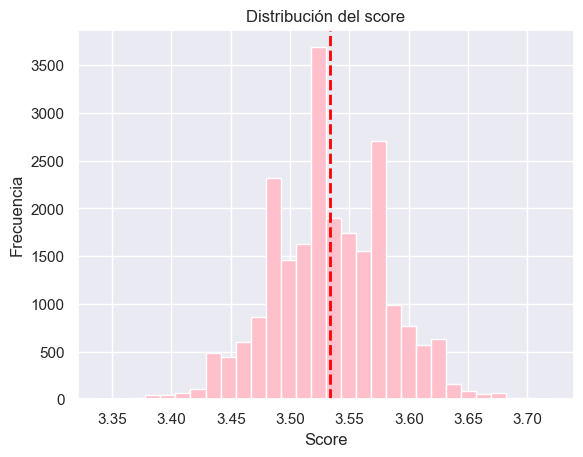

In [31]:
# Etiquetas de los ejes x e y
plt.xlabel('Score')
plt.ylabel('Frecuencia')
# Histograma con 20 bins
df['score'].hist(bins=30, color='pink')
# Título del gráfico
plt.title('Distribución del score')
# Línea vertical de la media
mean_score = df['score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2)
# Mostrar el gráfico
plt.show()

# Se puede ver una distribución bastante normal

+ Histograma de la duración

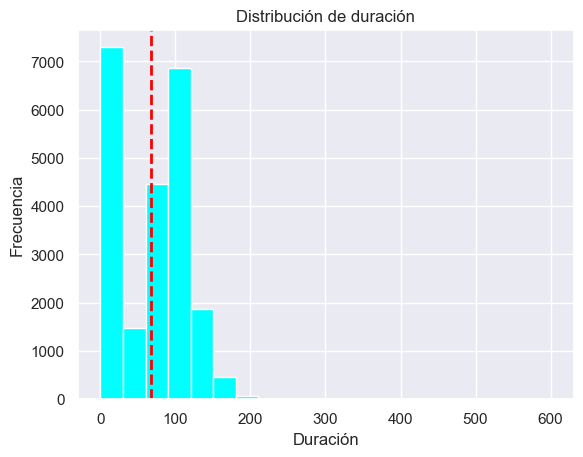

In [32]:
# Etiquetas de los ejes x e y
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
# Histograma con 20 bins
df['duration_int'].hist(bins=20, color='cyan')
# Título del gráfico
plt.title('Distribución de duración')
# Línea vertical de la media
mean_score = df['duration_int'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2)
# Mostrar el gráfico
plt.show()

# Se puede observar que hay valores atípicos hacia la derecha del gráfico, y que hay muchos valores cercanos a 0, que podrian ser de serias, ya que su duración va de (1+) seasons.

+ Histograma de los años

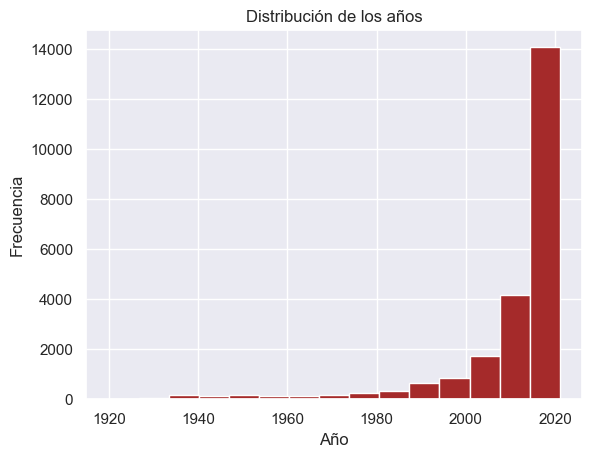

In [33]:
# Etiquetas de los ejes x e y
plt.xlabel('Año')
plt.ylabel('Frecuencia')
# Histograma con 20 bins
df['release_year'].hist(bins=15, color='brown')
# Título del gráfico
plt.title('Distribución de los años')
# Mostrar el gráfico
plt.show()

# Se puede observar claramente como se distribuyen los años y cuál tiene mas registros

+ Boxplots de score y duración

<Axes: ylabel='duration_int'>

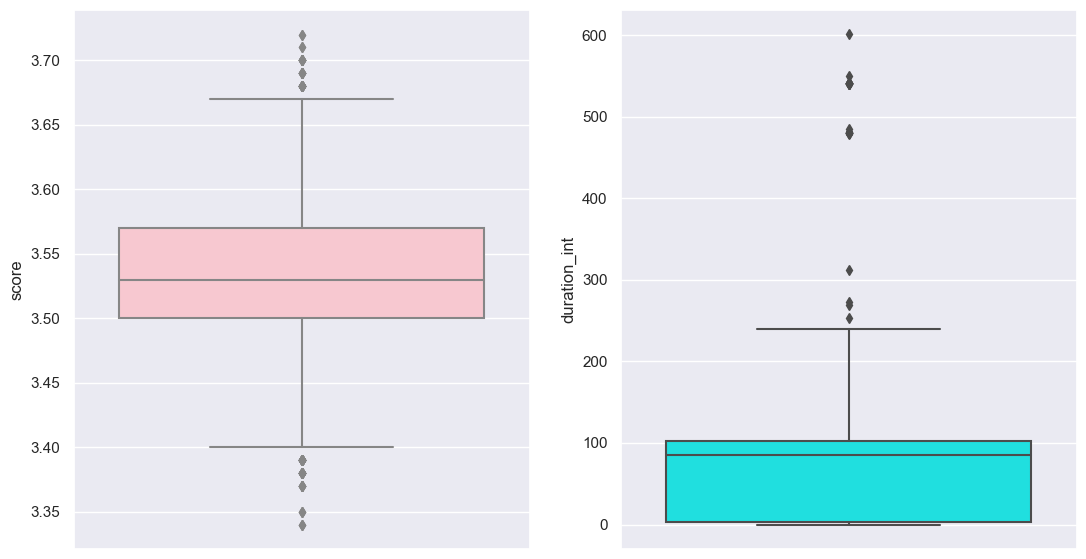

In [35]:
# Hacemos los boxplots de las columnas "score" y "duration_type" para observar mas en detalle
fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)

sns.boxplot(data=df,y='score',ax=ax1,color="pink")
sns.boxplot(data=df,y='duration_int',ax=ax2, color = "cyan")

# Aquí se pueden observar mas en detalle los valores atípicos

+ Vemos cómo se distribuyen los registros

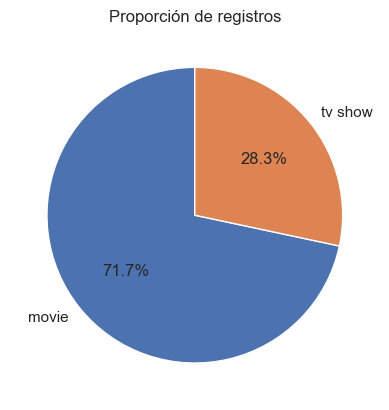

In [36]:
# Contar los valores únicos en la columna "type"
count = df['type'].value_counts()
# Crear un gráfico de torta
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
# Agregar un título al gráfico
plt.title('Proporción de registros')
# Mostrar el gráfico
plt.show()

# Se puede observar que hay muchas mas películas que series

C:\Users\matia\AppData\Local\Temp\ipykernel_12904\252529567.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


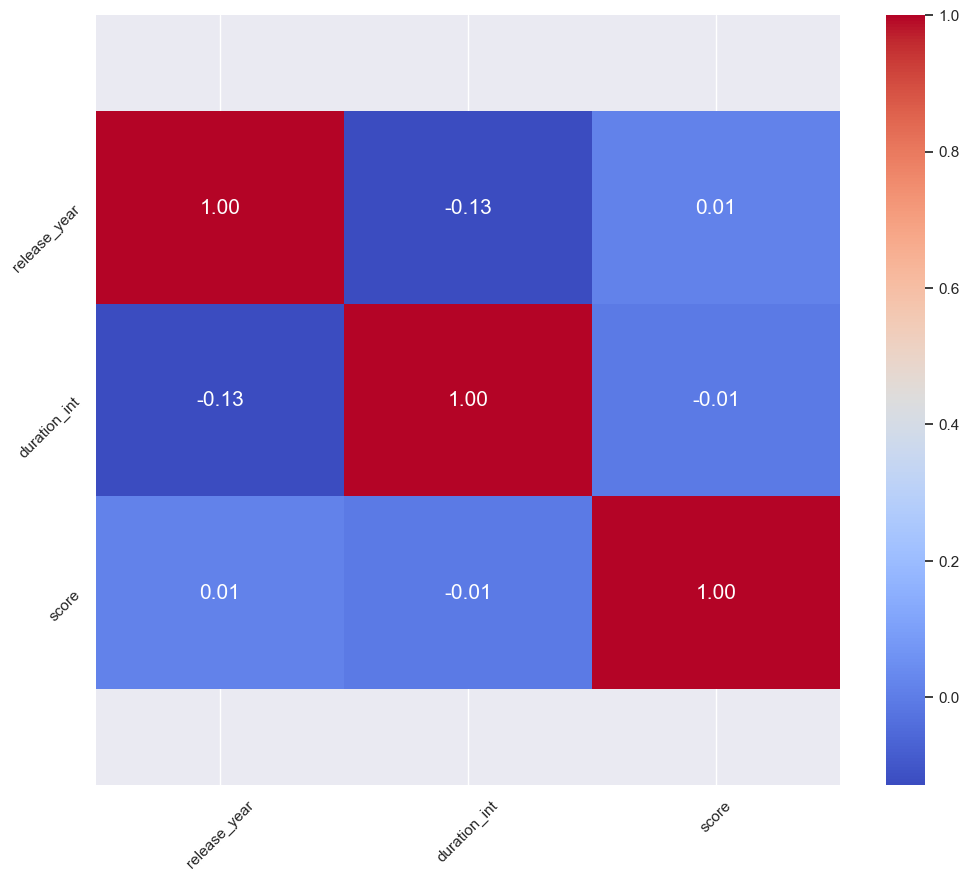

In [50]:
# Vemos las correlaciones entre las variables
def plot_corre_heatmap(corr):
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    
corr = df.corr()
plot_corre_heatmap(corr)  

# No se pueden ver muchas correlaciones debido a que no hay muchas variables numéricas

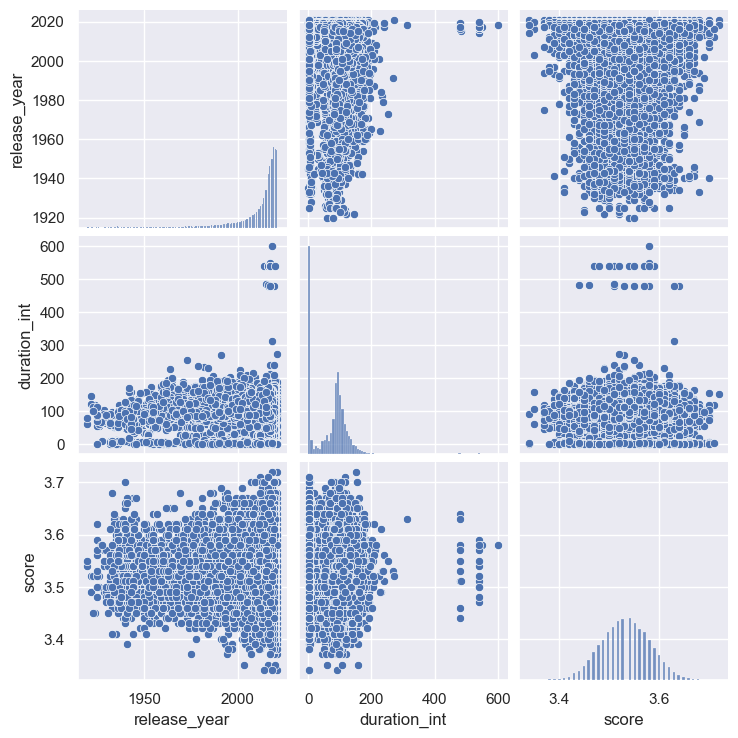

In [39]:
# Observamos lo mismo pero en un pairplot
sns.pairplot(df)

# **`Conclusiones`**

### De este análisis exploratorio de datos (`EDA`), se puede observar que es posible aplicar varias transformaciones a los datos con el fin de mejorar su calidad y garantizar la obtención de información precisa y útil. Este conjunto de datos es muy interesante y presenta muchas oportunidades para realizar diversas tareas, como la imputación de valores faltantes, la creación de nuevas columnas y la corrección de valores erróneos, entre otras. 

### La mayoría de estas transformaciones se llevarán a cabo en el archivo "modelo.iypnb", con el objetivo de crear y mejorar un modelo de recomendación sólido, basado en las observaciones obtenidas a partir de este análisis exploratorio.
